<a href="https://colab.research.google.com/github/Long-Live-Lord-Voldemort/Machine_Learning/blob/main/H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [3]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 61 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.3-py2.py3-none-any.whl size=177103819 sha256=0ea9c734ab7a20f0ade09461f09732e18055d7016e461c95004015b95b072a28
  Stored in directory: /root/.cache/pip/wheels/64/86/0f/d54be71f64b85d238edb037069bc866f2156cc563bf02be527
Successfully built h2o


In [4]:
import h2o

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9frwgi8l
  JVM stdout: /tmp/tmp9frwgi8l/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9frwgi8l/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_kpwbpz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
from h2o.automl import H2OAutoML

In [7]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
churn_df.head(11)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [10]:
churn_df.tail(11)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.5,2625.25,No
0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.7,1495.1,No
7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No
8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes


In [11]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [12]:
churn_df.describe

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<bound method H2OFrame.describe of >

In [14]:
churn_df.summary

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<bound method H2OFrame.summary of >

In [15]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [16]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes


In [17]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [ ]:
!nvidia-smi

In [21]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
19:14:26.849: Project: AutoML_1_20220717_191426
19:14:26.850: Cross-validation disabled by user: no fold column nor nfolds > 1.
19:14:26.851: Setting stopping tolerance adaptively based on the training frame: 0.014272612797395282
19:14:26.851: Build control seed: 10
19:14:26.852: training frame: Frame key: AutoML_1_20220717_191426_training_py_5_sid_9172    cols: 21    rows: 4909  chunks: 8    size: 265602  checksum: 6756044191950784218
19:14:26.852: validation frame: Frame key: py_7_sid_9172    cols: 21    rows: 1066  chunks: 8    size: 139291  checksum: 4968605962498144765
19:14:26.852: leaderboard frame: Frame key: py_7_sid_9172    cols: 21    rows: 1066  chunks: 8    size: 139291  checksum: 4968605962498144765
19:14:26.852: blending frame: NULL
19:14:26.853: response column: Churn
19:14:26.853: fold column: null
19:14:26.853: weights column: null
19:14:26.876: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w)

,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 7.05E-4 ),"nlambda = 30, lambda.max = 15.596, lambda.min = 7.05E-4, lambda.1s...",45,45,43,AutoML_1_20220717_191426_training_py_5_sid_9172




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13453399678588684
RMSE: 0.36678876316742154
LogLoss: 0.41655273131669224
Null degrees of freedom: 4908
Residual degrees of freedom: 4863
Null deviance: 5681.294685453894
Residual deviance: 4089.7147160672844
AIC: 4181.714716067285
AUC: 0.8458301994331099
AUCPR: 0.6628696568035147
Gini: 0.6916603988662198

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2957076095638368: 


,,No,Yes,Error,Rate
0,No,2756.0,850.0,0.2357,(850.0/3606.0)
1,Yes,298.0,1005.0,0.2287,(298.0/1303.0)
2,Total,3054.0,1855.0,0.2339,(1148.0/4909.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.295708,0.636479,221.0
1,max f2,0.170095,0.749362,286.0
2,max f0point5,0.551991,0.652084,111.0
3,max accuracy,0.551991,0.811571,111.0
4,max precision,0.851546,1.000000,0.0
5,max recall,0.003872,1.000000,397.0
6,max specificity,0.851546,1.000000,0.0
7,max absolute_mcc,0.403912,0.487805,174.0
8,max min_per_class_accuracy,0.297463,0.765391,220.0
9,max mean_per_class_accuracy,0.295708,0.767789,221.0



Gains/Lift Table: Avg response rate: 26.54 %, avg score: 26.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010185,0.781070,3.240015,3.240015,0.860000,0.806002,0.860000,0.806002,0.033001,0.033001,224.001535,224.001535,0.031060
1,2,0.020167,0.763357,3.152364,3.196632,0.836735,0.773026,0.848485,0.789680,0.031466,0.064467,215.236425,219.663248,0.060307
2,3,0.030149,0.743335,3.152364,3.181976,0.836735,0.752691,0.844595,0.777434,0.031466,0.095932,215.236425,218.197611,0.089554
3,4,0.040130,0.733431,2.998590,3.136362,0.795918,0.738095,0.832487,0.767649,0.029931,0.125863,199.859038,213.636240,0.116712
4,5,0.050112,0.720197,3.075477,3.124235,0.816327,0.728354,0.829268,0.759822,0.030698,0.156562,207.547731,212.423488,0.144915
5,6,0.100020,0.657296,2.660288,2.892734,0.706122,0.689177,0.767821,0.724571,0.132771,0.289332,166.028788,189.273383,0.257718
6,7,0.150132,0.591678,2.404436,2.729747,0.638211,0.623772,0.724559,0.690926,0.120491,0.409823,140.443567,172.974693,0.353528
7,8,0.200041,0.527655,2.198966,2.597322,0.583673,0.558196,0.689409,0.657811,0.109747,0.519570,119.896628,159.732202,0.434989
8,9,0.300061,0.390649,1.457876,2.217507,0.386965,0.457228,0.588595,0.590950,0.145817,0.665388,45.787647,121.750683,0.497334
9,10,0.400081,0.272193,1.235358,1.971970,0.327902,0.327242,0.523422,0.525023,0.123561,0.788949,23.535848,97.196975,0.529381




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.1332529510042627
RMSE: 0.36503828703885666
LogLoss: 0.4076237024358318
Null degrees of freedom: 1065
Residual degrees of freedom: 1020
Null deviance: 1211.4142754797924
Residual deviance: 869.0537335931934
AIC: 961.0537335931934
AUC: 0.8476903985775671
AUCPR: 0.6289603900489777
Gini: 0.6953807971551342

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36592098641769794: 


,,No,Yes,Error,Rate
0,No,646.0,148.0,0.1864,(148.0/794.0)
1,Yes,74.0,198.0,0.2721,(74.0/272.0)
2,Total,720.0,346.0,0.2083,(222.0/1066.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.365921,0.640777,176.0
1,max f2,0.158442,0.765550,279.0
2,max f0point5,0.559210,0.615602,98.0
3,max accuracy,0.559210,0.804878,98.0
4,max precision,0.836322,1.000000,0.0
5,max recall,0.005383,1.000000,395.0
6,max specificity,0.836322,1.000000,0.0
7,max absolute_mcc,0.365921,0.504224,176.0
8,max min_per_class_accuracy,0.310788,0.772040,199.0
9,max mean_per_class_accuracy,0.306099,0.774467,201.0



Gains/Lift Table: Avg response rate: 25.52 %, avg score: 26.73 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010319,0.786697,3.562834,3.562834,0.909091,0.800898,0.909091,0.800898,0.036765,0.036765,256.283422,256.283422,0.035505
1,2,0.020638,0.767399,2.493984,3.028409,0.636364,0.776284,0.772727,0.788591,0.025735,0.062500,149.398396,202.840909,0.056203
2,3,0.030019,0.747729,3.527206,3.184283,0.900000,0.755934,0.812500,0.778386,0.033088,0.095588,252.720588,218.428309,0.088032
3,4,0.040338,0.732124,2.850267,3.098837,0.727273,0.740535,0.790698,0.768703,0.029412,0.125000,185.026738,209.883721,0.113665
4,5,0.050657,0.714530,1.781417,2.830474,0.454545,0.724692,0.722222,0.759738,0.018382,0.143382,78.141711,183.047386,0.124491
5,6,0.100375,0.654478,2.662042,2.747045,0.679245,0.686694,0.700935,0.723557,0.132353,0.275735,166.204218,174.704508,0.235433
6,7,0.150094,0.603061,2.440205,2.645404,0.622642,0.625194,0.675000,0.690974,0.121324,0.397059,144.020533,164.540441,0.331568
7,8,0.200750,0.535683,1.959559,2.472341,0.500000,0.571262,0.630841,0.660767,0.099265,0.496324,95.955882,147.234057,0.396827
8,9,0.300188,0.406687,1.848640,2.265740,0.471698,0.468598,0.578125,0.597111,0.183824,0.680147,84.864040,126.573989,0.510122
9,10,0.400563,0.269369,1.135445,1.982504,0.289720,0.332414,0.505855,0.530782,0.113971,0.794118,13.544530,98.250448,0.528375




Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,alpha,iterations,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-07-17 19:14:30,0.000 sec,2,.16E2,46.0,1.144129,1.122979,0.0,NaN,...,,,,,,,,,,
1,,2022-07-17 19:14:30,0.074 sec,4,.97E1,46.0,1.136575,1.11529,0.0,NaN,...,,,,,,,,,,
2,,2022-07-17 19:14:30,1.625 sec,5,None,NaN,,,,5.0,...,0.66287,3.240015,0.233856,0.365038,0.407624,0.298865,0.84769,0.62896,3.562834,0.208255
3,,2022-07-17 19:14:30,0.139 sec,6,.6E1,46.0,1.125133,1.103648,0.0,NaN,...,,,,,,,,,,
4,,2022-07-17 19:14:30,0.186 sec,8,.37E1,46.0,1.108375,1.086604,0.0,NaN,...,,,,,,,,,,
5,,2022-07-17 19:14:30,0.229 sec,10,.23E1,46.0,1.08504,1.062887,0.0,NaN,...,,,,,,,,,,
6,,2022-07-17 19:14:30,0.287 sec,12,.14E1,46.0,1.054719,1.032104,0.0,NaN,...,,,,,,,,,,
7,,2022-07-17 19:14:30,0.336 sec,14,.89E0,46.0,1.018739,0.995635,0.0,NaN,...,,,,,,,,,,
8,,2022-07-17 19:14:30,0.391 sec,16,.56E0,46.0,0.980328,0.956818,0.0,NaN,...,,,,,,,,,,
9,,2022-07-17 19:14:30,0.444 sec,18,.35E0,46.0,0.943621,0.91991,0.0,NaN,...,,,,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,1.287580,1.000000,0.174879
1,Contract.Month-to-month,0.587447,0.456241,0.079787
2,Contract.Two year,0.557252,0.432790,0.075686
3,TotalCharges,0.481950,0.374307,0.065458
4,InternetService.Fiber optic,0.356249,0.276681,0.048386
5,InternetService.DSL,0.297142,0.230776,0.040358
6,PaymentMethod.Electronic check,0.264095,0.205109,0.035869
7,OnlineSecurity.No,0.234748,0.182317,0.031884
8,TechSupport.No,0.223765,0.173788,0.030392
9,MultipleLines.No,0.192982,0.149880,0.026211



See the whole table with table.as_data_frame()


In [22]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [23]:
lb = aml.leaderboard


In [24]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_1_20220717_191426,0.84769,0.407624,0.62896,0.229228,0.365038,0.133253
GBM_1_AutoML_1_20220717_191426,0.846454,0.410541,0.633841,0.224274,0.366224,0.13412
XGBoost_3_AutoML_1_20220717_191426,0.845834,0.410186,0.647935,0.218606,0.367252,0.134874
GBM_2_AutoML_1_20220717_191426,0.84472,0.412038,0.633437,0.214606,0.366773,0.134522
GBM_3_AutoML_1_20220717_191426,0.843319,0.415189,0.643331,0.234044,0.368514,0.135803
XGBoost_1_AutoML_1_20220717_191426,0.838981,0.423866,0.63784,0.228613,0.371293,0.137859
GBM_4_AutoML_1_20220717_191426,0.835712,0.427884,0.630885,0.239406,0.374777,0.140458
DRF_1_AutoML_1_20220717_191426,0.834244,0.424121,0.618786,0.230979,0.373418,0.139441
XRT_1_AutoML_1_20220717_191426,0.8296,0.429942,0.604251,0.231914,0.375143,0.140733
XGBoost_2_AutoML_1_20220717_191426,0.8286,0.438125,0.6193,0.22902,0.377612,0.142591


In [25]:
churn_pred=aml.leader.predict(churn_test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [26]:
churn_pred.head()

predict,No,Yes
No,0.713641,0.286359
No,0.959931,0.0400689
No,0.879331,0.120669
No,0.672686,0.327314
Yes,0.286485,0.713515
No,0.673548,0.326452
No,0.991334,0.00866632
Yes,0.362589,0.637411
No,0.7345,0.2655
No,0.921666,0.0783343


In [27]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.13583513397021696
RMSE: 0.3685581826119412
LogLoss: 0.41247427028202566
Null degrees of freedom: 1067
Residual degrees of freedom: 1022
Null deviance: 1257.4370723730624
Residual deviance: 881.045041322407
AIC: 973.045041322407
AUC: 0.8531438415159346
AUCPR: 0.6813803751156449
Gini: 0.7062876830318692

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27836808639757366: 


,,No,Yes,Error,Rate
0,No,573.0,201.0,0.2597,(201.0/774.0)
1,Yes,52.0,242.0,0.1769,(52.0/294.0)
2,Total,625.0,443.0,0.2369,(253.0/1068.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.278368,0.656716,222.0
1,max f2,0.211262,0.773318,255.0
2,max f0point5,0.483614,0.639269,133.0
3,max accuracy,0.483614,0.800562,133.0
4,max precision,0.839549,1.000000,0.0
5,max recall,0.019587,1.000000,378.0
6,max specificity,0.839549,1.000000,0.0
7,max absolute_mcc,0.278368,0.510798,222.0
8,max min_per_class_accuracy,0.316142,0.772109,205.0
9,max mean_per_class_accuracy,0.258239,0.782471,231.0



Gains/Lift Table: Avg response rate: 27.53 %, avg score: 26.96 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010300,0.786206,3.632653,3.632653,1.000000,0.814907,1.000000,0.814907,0.037415,0.037415,263.265306,263.265306,0.037415
1,2,0.020599,0.758357,3.632653,3.632653,1.000000,0.769172,1.000000,0.792039,0.037415,0.074830,263.265306,263.265306,0.074830
2,3,0.030899,0.735099,2.641929,3.302412,0.727273,0.748005,0.909091,0.777361,0.027211,0.102041,164.192950,230.241187,0.098165
3,4,0.040262,0.722000,3.269388,3.294732,0.900000,0.728298,0.906977,0.765951,0.030612,0.132653,226.938776,229.473185,0.127485
4,5,0.050562,0.708531,2.641929,3.161754,0.727273,0.714465,0.870370,0.755463,0.027211,0.159864,164.192950,216.175359,0.150820
5,6,0.100187,0.642511,2.398922,2.783902,0.660377,0.676561,0.766355,0.716381,0.119048,0.278912,139.892183,178.390235,0.246612
6,7,0.150749,0.589979,2.018141,2.527063,0.555556,0.617272,0.695652,0.683139,0.102041,0.380952,101.814059,152.706300,0.317645
7,8,0.200375,0.526254,2.056219,2.410452,0.566038,0.555137,0.663551,0.651438,0.102041,0.482993,105.621871,141.045203,0.389970
8,9,0.300562,0.397809,1.799352,2.206752,0.495327,0.463130,0.607477,0.588669,0.180272,0.663265,79.935152,120.675186,0.500475
9,10,0.399813,0.286457,1.336542,1.990728,0.367925,0.346679,0.548009,0.528596,0.132653,0.795918,33.654216,99.072791,0.546564


In [28]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [29]:
model_ids

['GLM_1_AutoML_1_20220717_191426',
 'GBM_1_AutoML_1_20220717_191426',
 'XGBoost_3_AutoML_1_20220717_191426',
 'GBM_2_AutoML_1_20220717_191426',
 'GBM_3_AutoML_1_20220717_191426',
 'XGBoost_1_AutoML_1_20220717_191426',
 'GBM_4_AutoML_1_20220717_191426',
 'DRF_1_AutoML_1_20220717_191426',
 'XRT_1_AutoML_1_20220717_191426',
 'XGBoost_2_AutoML_1_20220717_191426']

In [30]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20220717_191426


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10387501439170406
RMSE: 0.32229646971647713
LogLoss: 0.3286292218543575
Mean Per-Class Error: 0.17947234697521697
AUC: 0.9144782572237199
AUCPR: 0.7934061223038887
Gini: 0.8289565144474398

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40659877232142855: 


,,No,Yes,Error,Rate
0,No,3200.0,406.0,0.1126,(406.0/3606.0)
1,Yes,321.0,982.0,0.2464,(321.0/1303.0)
2,Total,3521.0,1388.0,0.1481,(727.0/4909.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.406599,0.729840,186.0
1,max f2,0.202754,0.810101,272.0
2,max f0point5,0.501938,0.748018,147.0
3,max accuracy,0.494882,0.858016,150.0
4,max precision,0.972941,1.000000,0.0
5,max recall,0.007679,1.000000,393.0
6,max specificity,0.972941,1.000000,0.0
7,max absolute_mcc,0.427501,0.628631,178.0
8,max min_per_class_accuracy,0.316130,0.832779,222.0
9,max mean_per_class_accuracy,0.294690,0.839308,231.0



Gains/Lift Table: Avg response rate: 26.54 %, avg score: 26.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011204,0.917724,3.767460,3.767460,1.000000,0.929889,1.000000,0.929889,0.042210,0.042210,276.745971,276.745971,0.042210
1,2,0.020167,0.903627,3.424963,3.615239,0.909091,0.908628,0.959596,0.920440,0.030698,0.072909,242.496337,261.523911,0.071799
2,3,0.030149,0.880902,3.536799,3.589269,0.938776,0.891907,0.952703,0.910993,0.035303,0.108212,253.679891,258.926905,0.106271
3,4,0.040130,0.853019,3.536799,3.576218,0.938776,0.865403,0.949239,0.899653,0.035303,0.143515,253.679891,257.621810,0.140742
4,5,0.050112,0.817951,3.383025,3.537737,0.897959,0.834266,0.939024,0.886629,0.033768,0.177283,238.302504,253.773656,0.173123
5,6,0.100020,0.700552,2.983213,3.261039,0.791837,0.756938,0.865580,0.821915,0.148887,0.326170,198.321299,226.103946,0.307868
6,7,0.150132,0.616273,2.817937,3.113138,0.747967,0.659508,0.826323,0.767706,0.141213,0.467383,181.793734,211.313835,0.431887
7,8,0.200041,0.537358,2.598778,2.984810,0.689796,0.576616,0.792261,0.720031,0.129701,0.597084,159.877833,198.481024,0.540511
8,9,0.300061,0.379578,1.772471,2.580697,0.470468,0.458092,0.684997,0.632718,0.177283,0.774367,77.247086,158.069711,0.645692
9,10,0.400081,0.248411,1.135609,2.219425,0.301426,0.310143,0.589104,0.552074,0.113584,0.887951,13.560904,121.942509,0.664157




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13487410479282036
RMSE: 0.36725209978000173
LogLoss: 0.41018602130321224
Mean Per-Class Error: 0.21860646021632835
AUC: 0.8458336420210402
AUCPR: 0.6479347322084588
Gini: 0.6916672840420803

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30961139500141144: 


,,No,Yes,Error,Rate
0,No,622.0,172.0,0.2166,(172.0/794.0)
1,Yes,60.0,212.0,0.2206,(60.0/272.0)
2,Total,682.0,384.0,0.2176,(232.0/1066.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.309611,0.646341,210.0
1,max f2,0.085420,0.741695,323.0
2,max f0point5,0.598898,0.611588,99.0
3,max accuracy,0.603658,0.803940,97.0
4,max precision,0.939276,1.000000,0.0
5,max recall,0.012752,1.000000,386.0
6,max specificity,0.939276,1.000000,0.0
7,max absolute_mcc,0.309611,0.511071,210.0
8,max min_per_class_accuracy,0.309611,0.779412,210.0
9,max mean_per_class_accuracy,0.304612,0.781921,213.0



Gains/Lift Table: Avg response rate: 25.52 %, avg score: 26.79 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010319,0.910824,3.562834,3.562834,0.909091,0.925000,0.909091,0.925000,0.036765,0.036765,256.283422,256.283422,0.035505
1,2,0.020638,0.893618,3.562834,3.562834,0.909091,0.900397,0.909091,0.912699,0.036765,0.073529,256.283422,256.283422,0.071011
2,3,0.030019,0.874847,3.527206,3.551700,0.900000,0.883673,0.906250,0.903628,0.033088,0.106618,252.720588,255.170037,0.102839
3,4,0.040338,0.860355,2.493984,3.281122,0.636364,0.866845,0.837209,0.894219,0.025735,0.132353,149.398396,228.112175,0.123537
4,5,0.050657,0.825218,3.206551,3.265931,0.818182,0.842896,0.833333,0.883764,0.033088,0.165441,220.655080,226.593137,0.154106
5,6,0.101313,0.703219,2.540169,2.903050,0.648148,0.764069,0.740741,0.823916,0.128676,0.294118,154.016885,190.305011,0.258853
6,7,0.150094,0.600976,2.336397,2.718888,0.596154,0.652158,0.693750,0.768095,0.113971,0.408088,133.639706,171.888787,0.346375
7,8,0.200750,0.536924,1.524101,2.417400,0.388889,0.569537,0.616822,0.717992,0.077206,0.485294,52.410131,141.739967,0.382020
8,9,0.300188,0.386777,1.885613,2.241245,0.481132,0.456512,0.571875,0.631376,0.187500,0.672794,88.561321,124.124540,0.500250
9,10,0.400563,0.253699,1.318582,2.010039,0.336449,0.319741,0.512881,0.553285,0.132353,0.805147,31.858164,101.003926,0.543182




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-07-17 19:14:45,0.003 sec,0.0,0.500000,0.693147,0.500000,0.265431,1.000000,0.734569,0.500000,0.693147,0.500000,0.255159,1.000000,0.744841
1,,2022-07-17 19:14:45,0.150 sec,5.0,0.363139,0.423119,0.869590,0.714408,3.488389,0.195763,0.373023,0.438603,0.845283,0.635478,3.592525,0.220450
2,,2022-07-17 19:14:45,0.289 sec,10.0,0.348249,0.382376,0.879801,0.728774,3.541412,0.177022,0.366464,0.413158,0.846720,0.634866,3.562834,0.220450
3,,2022-07-17 19:14:46,0.444 sec,15.0,0.341433,0.366446,0.888336,0.746253,3.616761,0.171522,0.365467,0.408803,0.847878,0.641159,3.919118,0.241088
4,,2022-07-17 19:14:46,0.592 sec,20.0,0.337515,0.357507,0.893792,0.756138,3.616761,0.165410,0.365156,0.406610,0.848816,0.644820,3.919118,0.227017
5,,2022-07-17 19:14:46,0.739 sec,25.0,0.333417,0.349095,0.899940,0.766270,3.692111,0.160725,0.365946,0.408971,0.847822,0.641337,3.562834,0.229831
6,,2022-07-17 19:14:46,0.897 sec,30.0,0.326775,0.337100,0.908630,0.783242,3.692111,0.153799,0.368702,0.414533,0.842838,0.641322,3.562834,0.219512
7,,2022-07-17 19:14:46,1.075 sec,35.0,0.322296,0.328629,0.914478,0.793406,3.767460,0.148095,0.367252,0.410186,0.845834,0.647935,3.562834,0.217636



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,732.209167,1.000000,0.173458
1,tenure,643.779968,0.879230,0.152509
2,TotalCharges,624.968079,0.853538,0.148053
3,MonthlyCharges,596.021790,0.814005,0.141195
4,TechSupport.No,428.502747,0.585219,0.101511
5,OnlineSecurity.No,295.315735,0.403322,0.069959
6,InternetService.DSL,124.326447,0.169796,0.029452
7,PaymentMethod.Electronic check,81.351646,0.111104,0.019272
8,PaperlessBilling.No,52.795776,0.072105,0.012507
9,Contract.One year,50.972488,0.069615,0.012075



See the whole table with table.as_data_frame()


In [31]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [32]:
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'cpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'bernoulli',
  'default': 'AUTO'

In [33]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 3.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 18,
  'silent': True,
  'subsample': 0.8,
  'tree_method': 'exact'},
 10000)

In [34]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20220717_191426


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10387501439170406
RMSE: 0.32229646971647713
LogLoss: 0.3286292218543575
Mean Per-Class Error: 0.17947234697521697
AUC: 0.9144782572237199
AUCPR: 0.7934061223038887
Gini: 0.8289565144474398

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40659877232142855: 


,,No,Yes,Error,Rate
0,No,3200.0,406.0,0.1126,(406.0/3606.0)
1,Yes,321.0,982.0,0.2464,(321.0/1303.0)
2,Total,3521.0,1388.0,0.1481,(727.0/4909.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.406599,0.729840,186.0
1,max f2,0.202754,0.810101,272.0
2,max f0point5,0.501938,0.748018,147.0
3,max accuracy,0.494882,0.858016,150.0
4,max precision,0.972941,1.000000,0.0
5,max recall,0.007679,1.000000,393.0
6,max specificity,0.972941,1.000000,0.0
7,max absolute_mcc,0.427501,0.628631,178.0
8,max min_per_class_accuracy,0.316130,0.832779,222.0
9,max mean_per_class_accuracy,0.294690,0.839308,231.0



Gains/Lift Table: Avg response rate: 26.54 %, avg score: 26.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011204,0.917724,3.767460,3.767460,1.000000,0.929889,1.000000,0.929889,0.042210,0.042210,276.745971,276.745971,0.042210
1,2,0.020167,0.903627,3.424963,3.615239,0.909091,0.908628,0.959596,0.920440,0.030698,0.072909,242.496337,261.523911,0.071799
2,3,0.030149,0.880902,3.536799,3.589269,0.938776,0.891907,0.952703,0.910993,0.035303,0.108212,253.679891,258.926905,0.106271
3,4,0.040130,0.853019,3.536799,3.576218,0.938776,0.865403,0.949239,0.899653,0.035303,0.143515,253.679891,257.621810,0.140742
4,5,0.050112,0.817951,3.383025,3.537737,0.897959,0.834266,0.939024,0.886629,0.033768,0.177283,238.302504,253.773656,0.173123
5,6,0.100020,0.700552,2.983213,3.261039,0.791837,0.756938,0.865580,0.821915,0.148887,0.326170,198.321299,226.103946,0.307868
6,7,0.150132,0.616273,2.817937,3.113138,0.747967,0.659508,0.826323,0.767706,0.141213,0.467383,181.793734,211.313835,0.431887
7,8,0.200041,0.537358,2.598778,2.984810,0.689796,0.576616,0.792261,0.720031,0.129701,0.597084,159.877833,198.481024,0.540511
8,9,0.300061,0.379578,1.772471,2.580697,0.470468,0.458092,0.684997,0.632718,0.177283,0.774367,77.247086,158.069711,0.645692
9,10,0.400081,0.248411,1.135609,2.219425,0.301426,0.310143,0.589104,0.552074,0.113584,0.887951,13.560904,121.942509,0.664157




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13487410479282036
RMSE: 0.36725209978000173
LogLoss: 0.41018602130321224
Mean Per-Class Error: 0.21860646021632835
AUC: 0.8458336420210402
AUCPR: 0.6479347322084588
Gini: 0.6916672840420803

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30961139500141144: 


,,No,Yes,Error,Rate
0,No,622.0,172.0,0.2166,(172.0/794.0)
1,Yes,60.0,212.0,0.2206,(60.0/272.0)
2,Total,682.0,384.0,0.2176,(232.0/1066.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.309611,0.646341,210.0
1,max f2,0.085420,0.741695,323.0
2,max f0point5,0.598898,0.611588,99.0
3,max accuracy,0.603658,0.803940,97.0
4,max precision,0.939276,1.000000,0.0
5,max recall,0.012752,1.000000,386.0
6,max specificity,0.939276,1.000000,0.0
7,max absolute_mcc,0.309611,0.511071,210.0
8,max min_per_class_accuracy,0.309611,0.779412,210.0
9,max mean_per_class_accuracy,0.304612,0.781921,213.0



Gains/Lift Table: Avg response rate: 25.52 %, avg score: 26.79 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010319,0.910824,3.562834,3.562834,0.909091,0.925000,0.909091,0.925000,0.036765,0.036765,256.283422,256.283422,0.035505
1,2,0.020638,0.893618,3.562834,3.562834,0.909091,0.900397,0.909091,0.912699,0.036765,0.073529,256.283422,256.283422,0.071011
2,3,0.030019,0.874847,3.527206,3.551700,0.900000,0.883673,0.906250,0.903628,0.033088,0.106618,252.720588,255.170037,0.102839
3,4,0.040338,0.860355,2.493984,3.281122,0.636364,0.866845,0.837209,0.894219,0.025735,0.132353,149.398396,228.112175,0.123537
4,5,0.050657,0.825218,3.206551,3.265931,0.818182,0.842896,0.833333,0.883764,0.033088,0.165441,220.655080,226.593137,0.154106
5,6,0.101313,0.703219,2.540169,2.903050,0.648148,0.764069,0.740741,0.823916,0.128676,0.294118,154.016885,190.305011,0.258853
6,7,0.150094,0.600976,2.336397,2.718888,0.596154,0.652158,0.693750,0.768095,0.113971,0.408088,133.639706,171.888787,0.346375
7,8,0.200750,0.536924,1.524101,2.417400,0.388889,0.569537,0.616822,0.717992,0.077206,0.485294,52.410131,141.739967,0.382020
8,9,0.300188,0.386777,1.885613,2.241245,0.481132,0.456512,0.571875,0.631376,0.187500,0.672794,88.561321,124.124540,0.500250
9,10,0.400563,0.253699,1.318582,2.010039,0.336449,0.319741,0.512881,0.553285,0.132353,0.805147,31.858164,101.003926,0.543182




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-07-17 19:14:45,0.003 sec,0.0,0.500000,0.693147,0.500000,0.265431,1.000000,0.734569,0.500000,0.693147,0.500000,0.255159,1.000000,0.744841
1,,2022-07-17 19:14:45,0.150 sec,5.0,0.363139,0.423119,0.869590,0.714408,3.488389,0.195763,0.373023,0.438603,0.845283,0.635478,3.592525,0.220450
2,,2022-07-17 19:14:45,0.289 sec,10.0,0.348249,0.382376,0.879801,0.728774,3.541412,0.177022,0.366464,0.413158,0.846720,0.634866,3.562834,0.220450
3,,2022-07-17 19:14:46,0.444 sec,15.0,0.341433,0.366446,0.888336,0.746253,3.616761,0.171522,0.365467,0.408803,0.847878,0.641159,3.919118,0.241088
4,,2022-07-17 19:14:46,0.592 sec,20.0,0.337515,0.357507,0.893792,0.756138,3.616761,0.165410,0.365156,0.406610,0.848816,0.644820,3.919118,0.227017
5,,2022-07-17 19:14:46,0.739 sec,25.0,0.333417,0.349095,0.899940,0.766270,3.692111,0.160725,0.365946,0.408971,0.847822,0.641337,3.562834,0.229831
6,,2022-07-17 19:14:46,0.897 sec,30.0,0.326775,0.337100,0.908630,0.783242,3.692111,0.153799,0.368702,0.414533,0.842838,0.641322,3.562834,0.219512
7,,2022-07-17 19:14:46,1.075 sec,35.0,0.322296,0.328629,0.914478,0.793406,3.767460,0.148095,0.367252,0.410186,0.845834,0.647935,3.562834,0.217636



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,732.209167,1.000000,0.173458
1,tenure,643.779968,0.879230,0.152509
2,TotalCharges,624.968079,0.853538,0.148053
3,MonthlyCharges,596.021790,0.814005,0.141195
4,TechSupport.No,428.502747,0.585219,0.101511
5,OnlineSecurity.No,295.315735,0.403322,0.069959
6,InternetService.DSL,124.326447,0.169796,0.029452
7,PaymentMethod.Electronic check,81.351646,0.111104,0.019272
8,PaperlessBilling.No,52.795776,0.072105,0.012507
9,Contract.One year,50.972488,0.069615,0.012075



See the whole table with table.as_data_frame()


In [35]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [36]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40659877232142855: 


,,No,Yes,Error,Rate
0,No,3200.0,406.0,0.1126,(406.0/3606.0)
1,Yes,321.0,982.0,0.2464,(321.0/1303.0)
2,Total,3521.0,1388.0,0.1481,(727.0/4909.0)


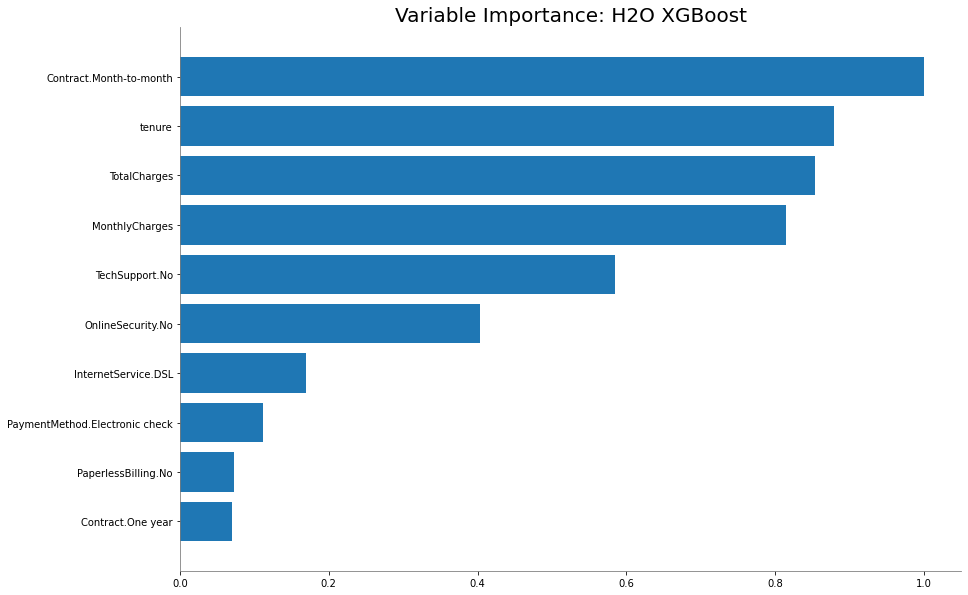

<Figure size 432x288 with 0 Axes>

In [37]:
out.varimp_plot()